In [4]:
import numpy as np
# import mnist dataset 
from keras.datasets import mnist
# import graph tool
import matplotlib.pyplot as plt 

In [5]:
def paint(X, nrows=2, ncols=5):
    # create area 2x5 for graph
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(12, 5))
    ax = ax.flatten()

    for i in range(10):
        ax[i].imshow(X[i].reshape(28, 28))

    plt.show()

[ENG] Case 1:
It's easier way for load dataset, call it 1 case. We load data from keras library.

[RUS] Случай 1:

Это более простой путь для загрузки данных(рукописного текста), назовем его случай 1. Мы загружаем данные из библиотеки keras.

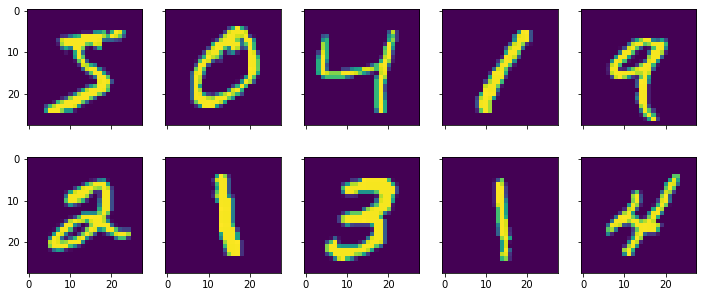

In [8]:
(X_train_1, y_train_1), (X_test_1, y_test_1) = mnist.load_data()

# change dim of array (60000, 28, 28) ---> (60000, 784)
X_train = X_train_1[:, :, :].reshape(60000, 784)
y_train = np.asarray(y_train_1)

paint(X_train)

[ENG] Case 2:

Here will be to use the hard way. Download data to localMachine from http://yann.lecun.com/exdb/mnist/. 

In the next step we going to create the function, which unpack data and will write to variable.

[RUS]
Случай 2:

Здесь будет сложный путь. Загрузим данные на локальный компьютер с сайта http://yann.lecun.com/exdb/mnist/.

На следующем шаге мы создаем функцию, которая распаковывает данные и загружает в переменную.

In [9]:
import os
import struct

# define function for load data
def load_data_mnist(path='None', name_img='None', name_lbl='None', key='None'):
    """ path --- the path to the file [string];
    
        name_img --- name of file, where keep the image [string] ;
        
        name_lbl --- name of file, where keep tha label [string];
        
        key --- type of file. While only 'nmist'.
    """
    cases = ('mnist')
    
    if key in cases:
        # create the all path (concatenate 2 string: path and name of file)
        path_img = os.path.join(path, name_img)
        path_lbl = os.path.join(path, name_lbl)
        
        # 'r+b' --- read from binary file
        with open(path_lbl, 'r+b') as lbl_path:
            # m --- description of file format
            # n --- number of elements
            m, n = struct.unpack('>II', lbl_path.read(8))
            # '>II' :
            #        > --- обратный порядок байтов, определяет порядок, в котором хранится после довательность байтов;
            #        I --- беззнаковое целое число.
            
            lbl = np.fromfile(lbl_path, dtype=np.uint8)
            
        with open(path_img, 'r+b') as img_path:
            magic, num, rows, cols = struct.unpack( ">IIII", img_path.read(16))
            
            img = np.fromfile(img_path, dtype=np.uint8).reshape(len(lbl), 784)
            
        return img, lbl
    else:
        print('Ошибка ключа!')
        return None

[ENG]

path -- path to ur file, img -- the name of ur file with test image, lbl -- the name of ur file with label to the test file. Reading the dataset and labels from file.

[RUS]

path -- путь к Вашему файлу, img -- имя Вашего файла с тестовыми данными(рукописные цифры), lbl -- имя Вашего файла с метками к тестовым данным. Производим чтение данных из файла.

In [10]:
path = 'C:\\Users\\Danya\\Desktop\\img_data'
img = 'train-images.idx3-ubyte'
lbl = 'train-labels.idx1-ubyte'

# read data from *.idx1-ubyte file
X_train_2, y_train_2 = load_data_mnist(path=path, name_img=img, name_lbl=lbl, key='mnist')

[ENG]

Importing the SVM classificator and StandardScaler for transform dataset to normal(gauss) distribution. Training the model. Outputing the score.

[RUS]

Импортируем SVM классификатор и StandardScaler для преобразования данных к нормальному распределению. Тренируем модель. Выводим скор.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train_2)

SVM = SVC(kernel = "poly", degree = 2)
SVM.fit(X_train_std, y_train_2)

In [ ]:
SVM.score(X_train_std, y_train_2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_2)

sol_for = RandomForestClassifier(n_estimators=100)

sol_for.fit(X_train_std, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# calculate percent number of true answer
sol_for.score(X_train_std, y_train_2)

1.0

In [13]:
path = 'C:\\Users\\Danya\\Desktop\\img_data'
img_test = 'test-images.idx3-ubyte'
lbl_test = 'test-labels.idx1-ubyte'

# read data from *.idx1-ubyte file
X_test_2, y_test_2 = load_data_mnist(path=path, name_img=img_test, name_lbl=lbl_test, key='mnist')

In [14]:
X_test_std = sc.fit_transform(X_test_2)
sol_for.score(X_test_std, y_test_2)

0.9586

In [15]:
def add_noise(X, n_px=1, key='mnist'):
    
    """ X --- the features matrix;
    
        n_px --- number of random pixels, which will be to adding ;
        
        name_lbl --- name of file, where keep tha label [string];
        
        key --- type of file. While only 'nmist'.
    """
    cases = ('mnist')
    
    size = 784
    
    if key in cases:
        
        X_noise = X.copy()
        
        for i in range(X.shape[0]):
            for j in range(n_px):
                rnd_px = np.random.randint(1, size)
                X_noise[i][rnd_px] = np.random.randint(1, 256)
        return X_noise
    else:
        print('Ошибка ключа')
        return None

[ENG]

Test the accuracy of prediction in depend on amount of trees in random forest.

[RUS]

Тестируем зависимость точности прогнозирования от количества деревьев в случайном лесу.

In [15]:
estimators = [i*10 for i in range(1, 11)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [38]:
pred = np.zeros(10)

for num in estimators:
    
    sol_for = RandomForestClassifier(n_estimators=num)
    sol_for.fit(X_train_std, y_train_2)
    
    print(int(num / 10) - 1, end=' ')
    pred[int(num / 10) - 1] = sol_for.score(X_test_std, y_test_2)

0
1
2
3
4
5
6
7
8
9


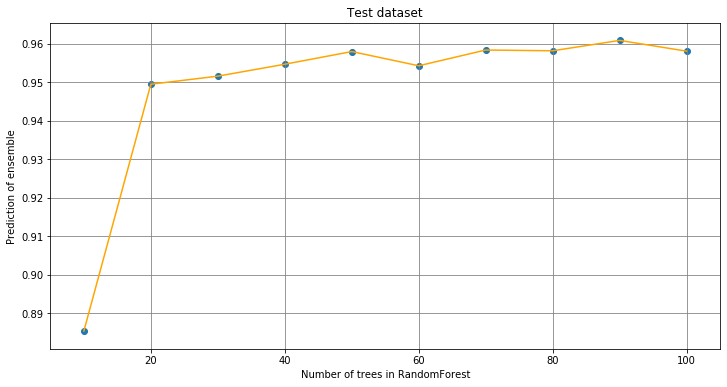

In [45]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(estimators, pred, color='orange')
ax.scatter(estimators, pred)

plt.title('Test dataset')
plt.grid(color='grey')
plt.xlabel('Number of trees in RandomForest')
plt.ylabel('Prediction of ensemble')

plt.show()

[ENG]

Adding the noise in dataset and check accuracy of prediction.

[RUS]

Добавляем шум в данные и смотрим на качество прогноза.

In [24]:
pixels = [10*i for i in np.arange(1, 11)]
pixels

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# Создаем модель с с нормальными данными. Тренируем на них же. Но в процессе тренировки добавляем добавляем данные с шумом.

pred = np.zeros(10)

# creating the model with 3 depth
rand_forest = RandomForestClassifier(n_estimators=90, max_depth=4)
# n_estimators --- number of trees in randomForest

rand_forest.fit(X_train_std, y_train_2)
for n_px in pixels:
    X_noise = add_noise(X_test_std, n_px=n_px)
    
    print(int(n_px / 10) - 1, end=' ')
    pred[int(n_px / 10) - 1] = rand_forest.score(X_noise, y_test_2)

0 

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(pixels, pred, color='red')
ax.scatter(pixels, pred, color='black')

plt.title('Test dataset [model trained with data without noise only one time]')
plt.grid(color='grey')
plt.xlabel('Number of noise pixels')
plt.ylabel('Prediction of ensemble with depth 3')

plt.show()